In [1]:
import numpy as np
from typing import List
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(0)

Vector = List[float]
Matrix = List[Vector]

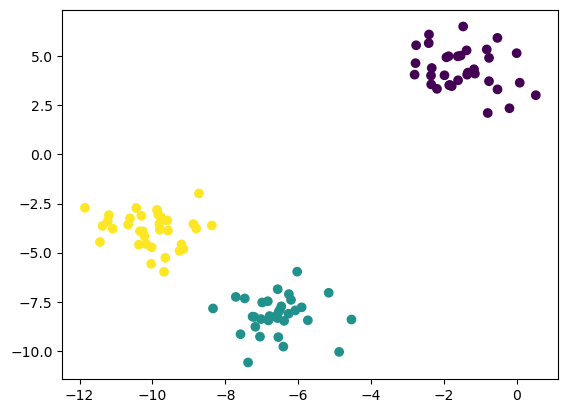

In [24]:
class KMeans:
    def __init__(self, n_clusters: int, max_iters: int = 100) -> None:
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def _distance(self, a: Vector, b: Vector) -> float:
        """Calculate the Euclidean distance between two vector"""
        return np.sqrt(np.sum((a - b) ** 2))

    def fit(self, xs: Matrix) -> None:
        """Fit model into the data."""

        self.n_samples, self.n_features = xs.shape
        # initialize random centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.n_clusters, replace=False)
        self.centroids = xs[random_sample_idxs]
        # optimize cluster
        for _ in range(self.max_iters):
            # assign each sample to nearest centroid/create cluster
            self.clusters = self._create_clusters(self.centroids, xs)
            # save the old centroid
            # calculate new centroids from the cluster mean
            centroids_old = self.centroids.copy()
            self.centroids = self._get_centroids(self.clusters)
            # check for convergence
            if self._is_converged(self.centroids, centroids_old):
                break

    def predict(self, xs: Vector) -> Vector:
        """Return the cluster label of each sample in xs."""
        if self.centroids is None:
            raise ValueError("Model has not been trained yet. Call fit method first.")
        return self._get_cluster_labels(self.clusters)

    def _create_clusters(self, centroids: Matrix, xs: Matrix) -> Matrix:
        """Create clusters by assigning each sample to the nearest centroid."""
        clusters = [[] for _ in range(self.n_clusters)]
        for idx, x in enumerate(xs):
            distances = [self._distance(x, centroid) for centroid in centroids]
            nearest_cluster = np.argmin(distances)
            clusters[nearest_cluster].append(idx)
        return clusters

    def _get_centroids(self, clusters: Matrix) -> Matrix:
        """Get mean point of each cluster."""
        centroids = np.array([np.mean(xs[cluster], axis=0) for cluster in clusters])
        return centroids

    def _get_cluster_labels(self, clusters: Matrix) -> Vector:
        """Get cluster label according to clusters."""
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def _is_converged(
        self, centroids_a: Matrix, centroids_b: Matrix, tol: float = 1e-5
    ) -> bool:
        """Check if centroids_a and centroids_b is in the same point."""
        distance = self._distance(centroids_a, centroids_b)
        return distance < tol


n_cluster = 3
xs, ys = make_blobs(n_samples=100, n_features=2, centers=n_cluster, random_state=1)
kmeans = KMeans(n_clusters=n_cluster)
kmeans.fit(xs)
ys_pred = kmeans.predict(xs)
plt.scatter(xs[:, 0], xs[:, 1], c=ys_pred)
plt.show()

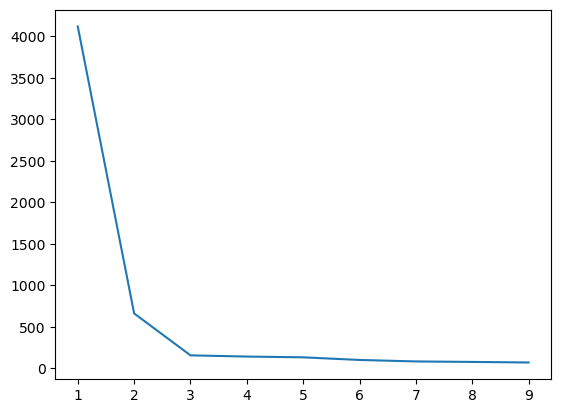

In [26]:
def clustering_squared_error(n_cluster, xs):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(xs)
    ys_pred = kmeans.predict(xs)
    centroids = kmeans.centroids
    centroid_means = np.asarray([centroids[int(ys)] for ys in ys_pred])
    squared_error = np.sum([np.sum((x - mean) ** 2) for x, mean in zip(xs, centroid_means)])
    return squared_error

clustering_squared_errors = [clustering_squared_error(k, xs) for k in range(1, 10)]
plt.plot(list(range(1, 10)), clustering_squared_errors)
plt.show()

# Explaination